In [1]:
import torch
import torch.nn.functional as F

from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import Resize, Compose, ToTensor, Normalize

import argparse
import os
import math 
import skimage
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import time
import pickle

from datetime import datetime
from pathlib import Path

# from data_classes.py_files.custom_datasets import *
# from data_classes.py_files.data_classes import *
from py_files.new_dataset import *

from py_files.cnn_model import *
from py_files.pigan_model import *

from py_files.pi_gan_functions import *

# %matplotlib qt

Imported CNN and Mapping functions.
Imported PI-Gan model.
Loaded all helper functions.


In [2]:
def show_runs(requirements, print_vars, last=None):
    runs = sorted(os.listdir(path='saved_runs'))
    
    runs = [run for run in runs if run != "old" and run !="saved"]
    if last: 
        runs = runs[-last:]
        
    for run in runs:
        ARGS = load_args(run, print_changed=False)

        if all([requirements[key] == vars(ARGS)[key] for key in requirements.keys()]):

            print(f"\n{run}\n")

            if print_vars:
                for key in print_vars:
                    if key in vars(ARGS).keys():
                        print(f"{key}: {vars(ARGS)[key]}")
                    else: 
                        print(f"{key} not in ARGS")
            else:
                for key, item in vars(ARGS).items():
                    print(f"{key}: {item}")

            print()

            mask_losses = pcmra_losses = dice_losses = None

            if os.path.exists(f'saved_runs/{run}/mask_loss.npy'):
                mask_losses = np.load(f'saved_runs/{run}/mask_loss.npy')

            if os.path.exists(f'saved_runs/{run}/pcmra_loss.npy'):
                pcmra_losses = np.load(f'saved_runs/{run}/pcmra_loss.npy')

            if os.path.exists(f'saved_runs/{run}/dice_loss.npy'):
                dice_losses = np.load(f'saved_runs/{run}/dice_loss.npy')

            fig, axes = plt.subplots(1, 3, figsize=(18,5))
            fig.patch.set_facecolor('white')

            if type(mask_losses) == np.ndarray:
                axes[0].plot(mask_losses[1:, 0], mask_losses[1:, 1], label='Train loss')
                axes[0].plot(mask_losses[1:, 0], mask_losses[1:, 3], label='Eval loss')
                axes[0].set_title('Mask Loss')

                i1, i2 = mask_losses[:, 1].argmin(), mask_losses[:, 3].argmin()
                print(f"Lowest train mask loss at epoch {int(mask_losses[i1, 0])}:\t{round(mask_losses[i1, 1], 6)}")
                print(f"Lowest eval  mask loss at epoch {int(mask_losses[i2, 0])}:\t{round(mask_losses[i2, 3], 6)}")
                print()

            if type(pcmra_losses)  == np.ndarray:
                axes[1].plot(pcmra_losses[1:, 0], pcmra_losses[1:, 1], label='Train loss')
                axes[1].plot(pcmra_losses[1:, 0], pcmra_losses[1:, 3], label='Eval loss')
                axes[1].set_title('PCMRA Loss')
                i5, i6 = pcmra_losses[:, 1].argmin(), pcmra_losses[:, 3].argmin()
                print(f"Lowest train pcmra loss at epoch {int(pcmra_losses[i5, 0])}:\t{round(pcmra_losses[i5, 1], 6)}")
                print(f"Lowest eval  pcmra loss at epoch {int(pcmra_losses[i6, 0])}:\t{round(pcmra_losses[i6, 3], 6)}")
                print()
            if type(dice_losses) == np.ndarray:
                axes[2].plot(dice_losses[1:, 0], dice_losses[1:, 1], label='Train loss')
                axes[2].plot(dice_losses[1:, 0], dice_losses[1:, 3], label='Eval loss')
                axes[2].set_title('Dice Loss')

                i3, i4 = dice_losses[:, 1].argmin(), dice_losses[:, 3].argmin()
                print(f"Lowest train dice loss at epoch {int(dice_losses[i3, 0])}:\t{round(dice_losses[i3, 1], 6)}")
                print(f"Lowest eval  dice loss at epoch {int(dice_losses[i4, 0])}:\t{round(dice_losses[i4, 3], 6)}")


            plt.show()

            print("\n\n\n")



pi-gan 2021-06-03 14:10:39 

cnn_setup: -1
mapping_setup: 7
dim_hidden: 256
siren_hidden_layers: 3
dataset: full
pretrained: None
pretrained_lr_reset: None
min_lr: 5e-06
pcmra_first_omega_0: 30.0
first_omega_0: 10.0
translate_max_pixels: 20
mask_train_cnn: True
siren_wd: 0
patience: 200

Lowest train mask loss at epoch 4850:	0.021879
Lowest eval  mask loss at epoch 2650:	0.02949

Lowest train dice loss at epoch 4800:	0.116997
Lowest eval  dice loss at epoch 4700:	0.180609


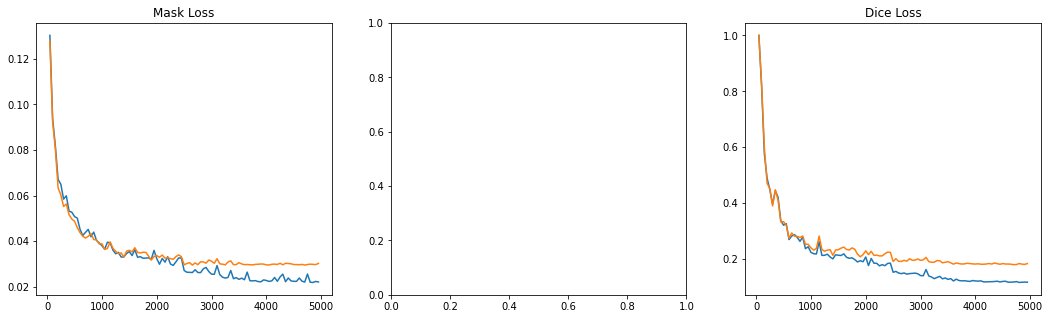






pi-gan 2021-06-03 17:10:40 cnn setup -1 mapping setup 7

cnn_setup: -1
mapping_setup: 7
dim_hidden: 256
siren_hidden_layers: 3
dataset: full
pretrained: pi-gan 2021-06-03 13:47:57 cnn setup -1 mapping setup 7
pretrained_lr_reset: None
min_lr: 5e-06
pcmra_first_omega_0: 30.0
first_omega_0: 100
translate_max_pixels: 20
mask_train_cnn: True
siren_wd: 0
patience: 100

Lowest train mask loss at epoch 4800:	0.026607
Lowest eval  mask loss at epoch 4650:	0.029794

Lowest train dice loss at epoch 4600:	0.152174
Lowest eval  dice loss at epoch 3850:	0.192435


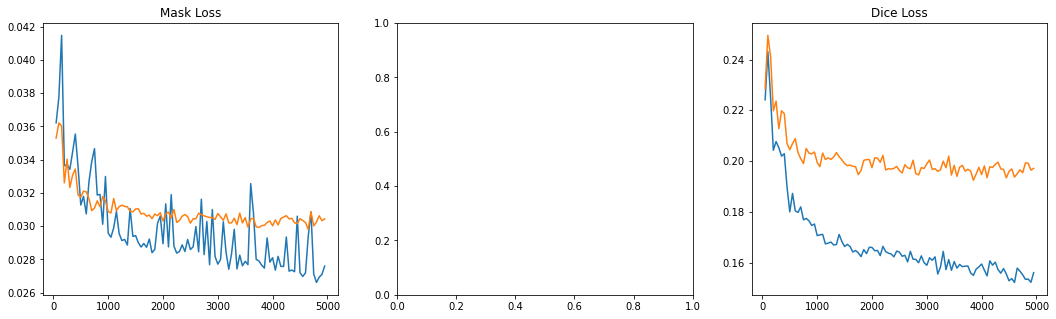






pi-gan 2021-06-03 20:49:07 

cnn_setup: -1
mapping_setup: 7
dim_hidden: 256
siren_hidden_layers: 3
dataset: full
pretrained: None
pretrained_lr_reset: None
min_lr: 5e-06
pcmra_first_omega_0: 30.0
first_omega_0: 300.0
translate_max_pixels: 20
mask_train_cnn: True
siren_wd: 0
patience: 200

Lowest train mask loss at epoch 4950:	0.030761
Lowest eval  mask loss at epoch 4450:	0.033264

Lowest train dice loss at epoch 4950:	0.174542
Lowest eval  dice loss at epoch 4450:	0.212479


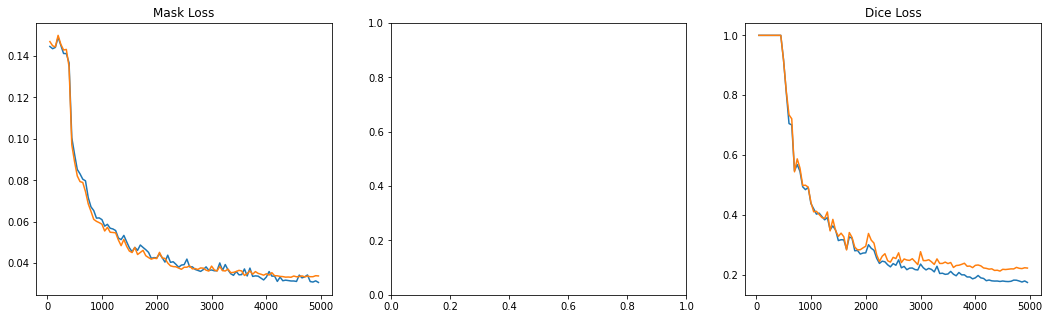






pi-gan 2021-06-04 00:44:48 cnn setup -1 mapping setup 7

cnn_setup: -1
mapping_setup: 7
dim_hidden: 256
siren_hidden_layers: 3
dataset: full
pretrained: None
pretrained_lr_reset: None
min_lr: 5e-06
pcmra_first_omega_0: 30.0
first_omega_0: 300
translate_max_pixels: 20
mask_train_cnn: True
siren_wd: 0
patience: 100

Lowest train mask loss at epoch 4900:	0.039038
Lowest eval  mask loss at epoch 4950:	0.036675

Lowest train dice loss at epoch 4800:	0.237257
Lowest eval  dice loss at epoch 4700:	0.240673


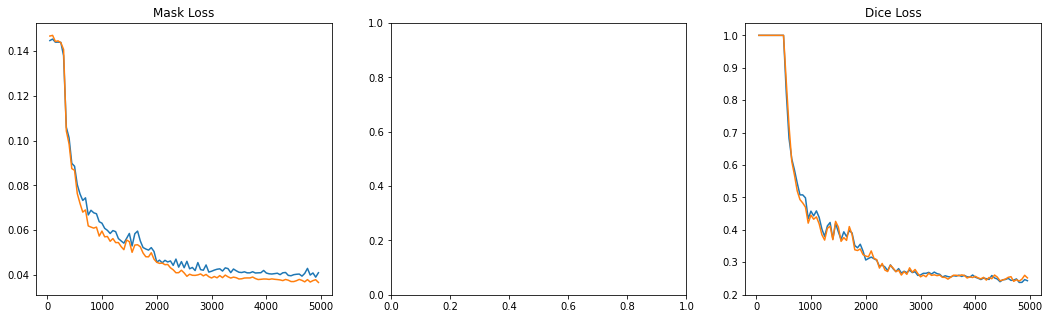






pi-gan 2021-06-04 03:26:57 

cnn_setup: -1
mapping_setup: 7
dim_hidden: 256
siren_hidden_layers: 3
dataset: full
pretrained: None
pretrained_lr_reset: None
min_lr: 5e-06
pcmra_first_omega_0: 30.0
first_omega_0: 1000.0
translate_max_pixels: 20
mask_train_cnn: True
siren_wd: 0
patience: 200

Lowest train mask loss at epoch 4950:	0.029942
Lowest eval  mask loss at epoch 4950:	0.03237

Lowest train dice loss at epoch 4850:	0.172339
Lowest eval  dice loss at epoch 4850:	0.207476


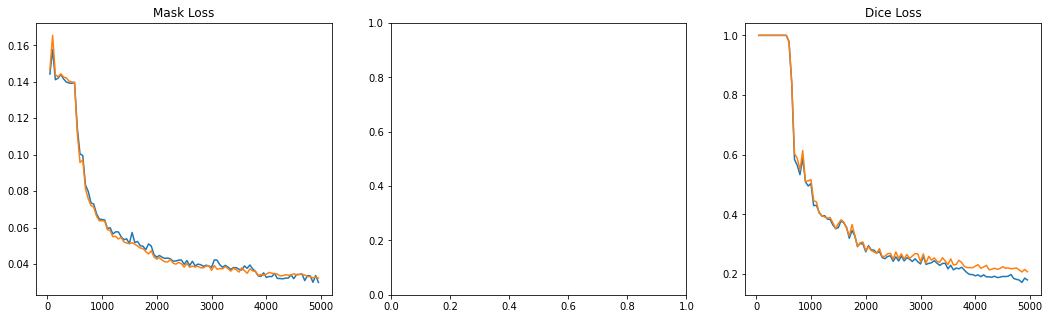






pi-gan 2021-06-05 00:58:36 

cnn_setup: -1
mapping_setup: 7
dim_hidden: 256
siren_hidden_layers: 3
dataset: new
pretrained: None
pretrained_lr_reset: None
min_lr: 5e-06
pcmra_first_omega_0: 30.0
first_omega_0: 5.0
translate_max_pixels: 20
mask_train_cnn: True
siren_wd: 0
patience: 100

Lowest train mask loss at epoch 4950:	0.019271
Lowest eval  mask loss at epoch 3650:	0.029942

Lowest train dice loss at epoch 4950:	0.145289
Lowest eval  dice loss at epoch 4450:	0.195819


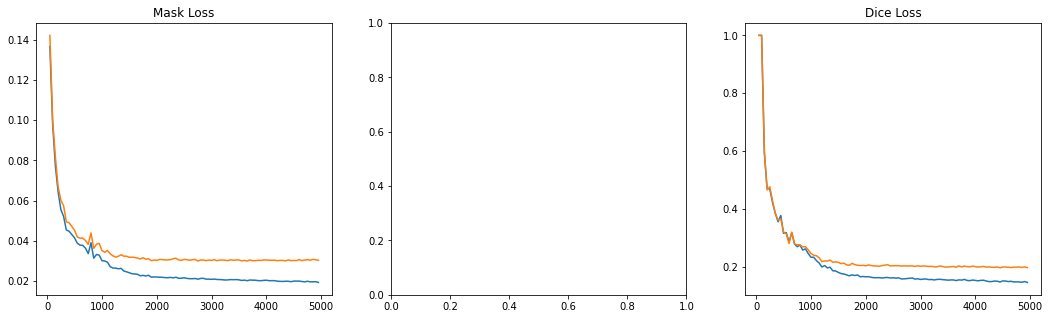






pi-gan 2021-06-05 01:02:59 

cnn_setup: -1
mapping_setup: 7
dim_hidden: 256
siren_hidden_layers: 3
dataset: new
pretrained: None
pretrained_lr_reset: None
min_lr: 5e-06
pcmra_first_omega_0: 5
first_omega_0: 30.0
translate_max_pixels: 20
mask_train_cnn: False
siren_wd: 0
patience: 100

Lowest train pcmra loss at epoch 4850:	0.00479
Lowest eval  pcmra loss at epoch 4600:	0.006528



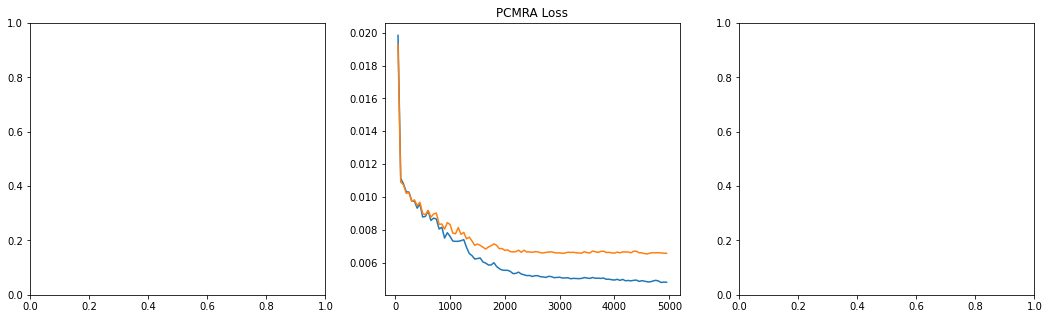






pi-gan 2021-06-05 10:22:57 

cnn_setup: -1
mapping_setup: 7
dim_hidden: 256
siren_hidden_layers: 3
dataset: new
pretrained: None
pretrained_lr_reset: None
min_lr: 5e-06
pcmra_first_omega_0: 30.0
first_omega_0: 10.0
translate_max_pixels: 20
mask_train_cnn: True
siren_wd: 0
patience: 200

Lowest train mask loss at epoch 4850:	0.014915
Lowest eval  mask loss at epoch 2650:	0.030144

Lowest train dice loss at epoch 4850:	0.113366
Lowest eval  dice loss at epoch 4900:	0.188184


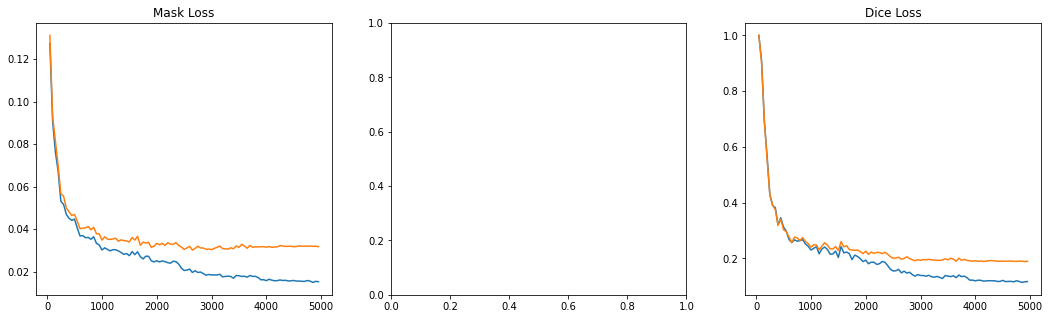






pi-gan 2021-06-05 20:21:38 

cnn_setup: -5
mapping_setup: -2
dim_hidden: 256
siren_hidden_layers: 3
dataset: new
pretrained: None
pretrained_lr_reset: None
min_lr: 5e-06
pcmra_first_omega_0: 30.0
first_omega_0: 30
translate_max_pixels: 20
mask_train_cnn: True
siren_wd: 0
patience: 100

Lowest train mask loss at epoch 4800:	0.018211
Lowest eval  mask loss at epoch 2850:	0.029687

Lowest train dice loss at epoch 4900:	0.13815
Lowest eval  dice loss at epoch 4550:	0.191365


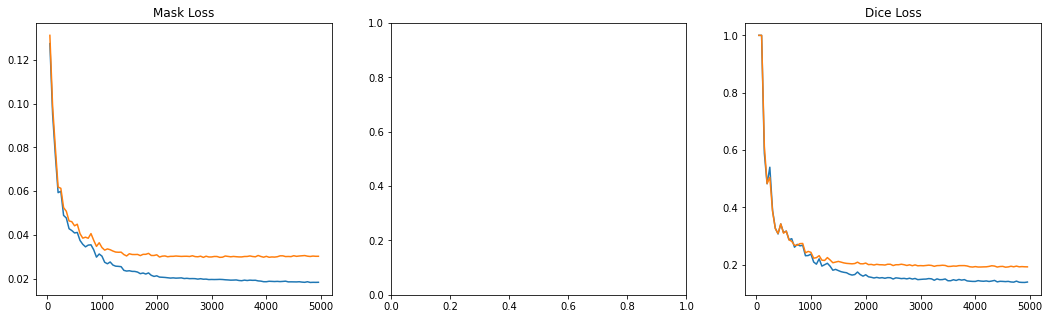






pi-gan 2021-06-06 15:12:37 

cnn_setup: -1
mapping_setup: -1
dim_hidden: 256
siren_hidden_layers: 4
dataset: new
pretrained: None
pretrained_lr_reset: None
min_lr: 5e-06
pcmra_first_omega_0: 30.0
first_omega_0: 30.0
translate_max_pixels: 20
mask_train_cnn: True
siren_wd: 0
patience: 200

Lowest train mask loss at epoch 4550:	0.015057
Lowest eval  mask loss at epoch 2750:	0.031205

Lowest train dice loss at epoch 4850:	0.114932
Lowest eval  dice loss at epoch 4500:	0.196679


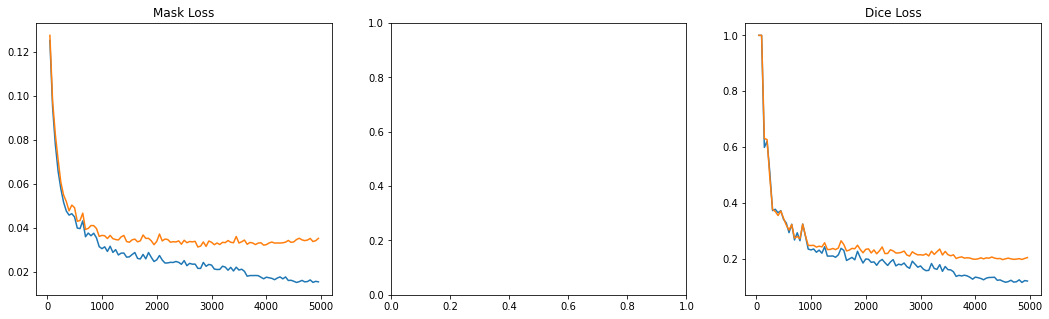






pi-gan 2021-06-06 17:46:56 

cnn_setup: -6
mapping_setup: -5
dim_hidden: 256
siren_hidden_layers: 3
dataset: new
pretrained: None
pretrained_lr_reset: None
min_lr: 5e-06
pcmra_first_omega_0: 30.0
first_omega_0: 30.0
translate_max_pixels: 20
mask_train_cnn: True
siren_wd: 0
patience: 200

Lowest train mask loss at epoch 4650:	0.018157
Lowest eval  mask loss at epoch 4000:	0.029856

Lowest train dice loss at epoch 4900:	0.136704
Lowest eval  dice loss at epoch 4550:	0.190559


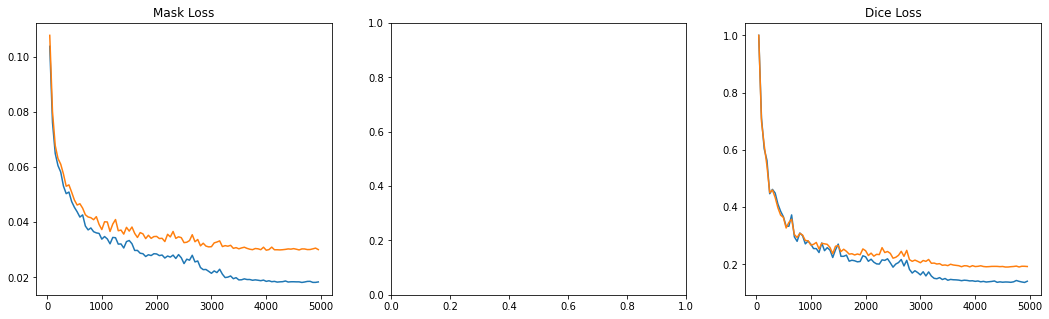






pi-gan 2021-06-06 23:57:12 

cnn_setup: -1
mapping_setup: -1
dim_hidden: 512
siren_hidden_layers: 3
dataset: new
pretrained: None
pretrained_lr_reset: None
min_lr: 5e-06
pcmra_first_omega_0: 30.0
first_omega_0: 30.0
translate_max_pixels: 20
mask_train_cnn: True
siren_wd: 0
patience: 200

Lowest train mask loss at epoch 4850:	0.014219
Lowest eval  mask loss at epoch 2000:	0.030454

Lowest train dice loss at epoch 4850:	0.108442
Lowest eval  dice loss at epoch 4400:	0.194588


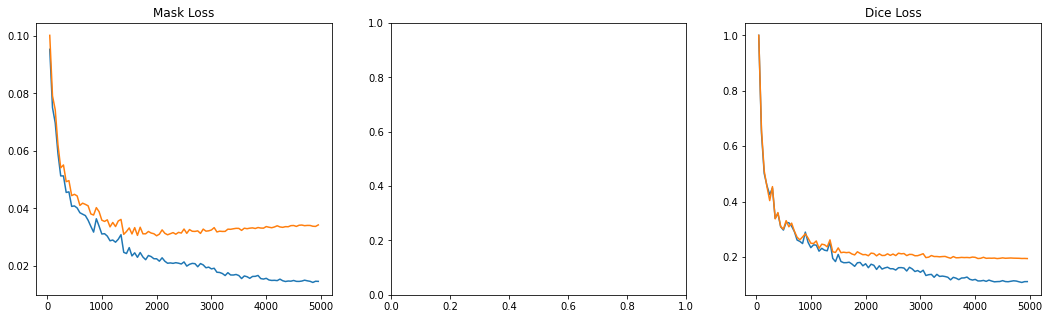






pi-gan 2021-06-07 09:48:16 

cnn_setup: -1
mapping_setup: -1
dim_hidden: 256
siren_hidden_layers: 3
dataset: new
pretrained: None
pretrained_lr_reset: None
min_lr: 1e-05
pcmra_first_omega_0: 30.0
first_omega_0: 10.0
translate_max_pixels: 20
mask_train_cnn: True
siren_wd: 0
patience: 200

Lowest train mask loss at epoch 1550:	0.025622
Lowest eval  mask loss at epoch 1550:	0.032841

Lowest train dice loss at epoch 1550:	0.196978
Lowest eval  dice loss at epoch 1450:	0.224943


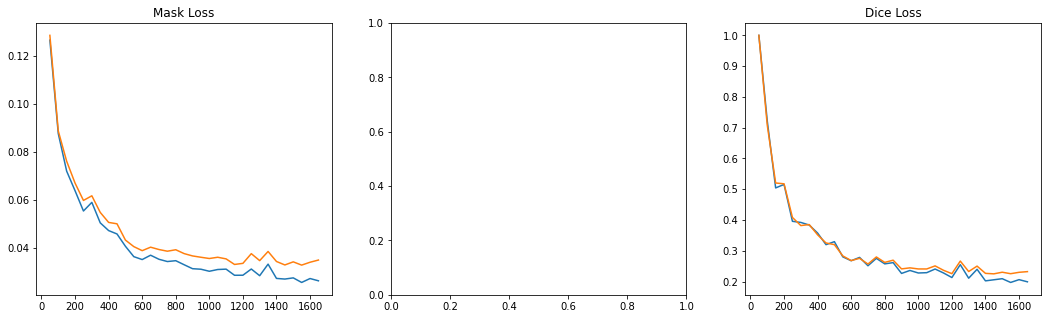






pi-gan 2021-06-07 12:05:58 

cnn_setup: -1
mapping_setup: -1
dim_hidden: 256
siren_hidden_layers: 3
dataset: new
pretrained: pi-gan 2021-06-07 09:48:16 
pretrained_lr_reset: None
min_lr: 5e-06
pcmra_first_omega_0: 30.0
first_omega_0: 10
translate_max_pixels: 20
mask_train_cnn: True
siren_wd: 0
patience: 100

Lowest train mask loss at epoch 900:	0.020173
Lowest eval  mask loss at epoch 700:	0.029558

Lowest train dice loss at epoch 900:	0.151224
Lowest eval  dice loss at epoch 850:	0.198867


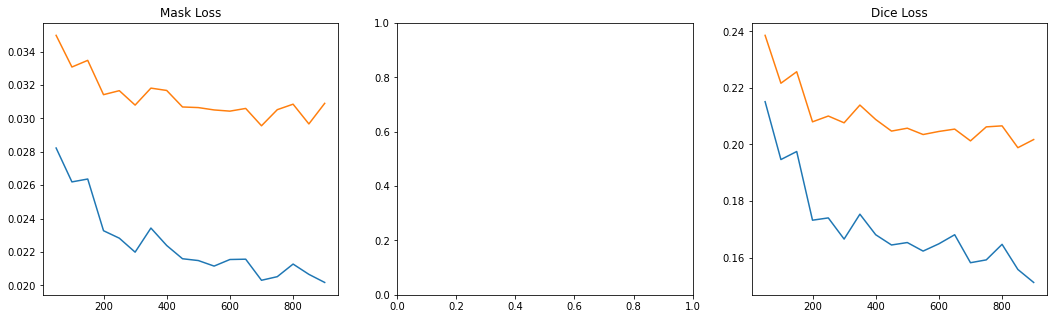






pi-gan 2021-06-07 14:14:42 

cnn_setup: -1
mapping_setup: -1
dim_hidden: 256
siren_hidden_layers: 3
dataset: new
pretrained: pi-gan 2021-06-07 09:48:16 
pretrained_lr_reset: 1e-05
min_lr: 1e-05
pcmra_first_omega_0: 30.0
first_omega_0: 10
translate_max_pixels: 20
mask_train_cnn: True
siren_wd: 0
patience: 100

Lowest train mask loss at epoch 550:	0.021431
Lowest eval  mask loss at epoch 550:	0.030663

Lowest train dice loss at epoch 550:	0.159716
Lowest eval  dice loss at epoch 550:	0.201581


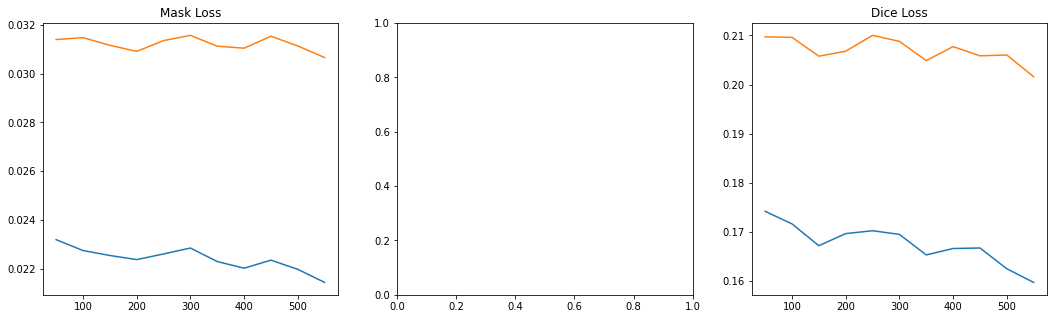

In [3]:
# requirements = {"cnn_setup": -6}
requirements = {}

# print_vars = None
print_vars = ["cnn_setup", "mapping_setup", "dim_hidden", "siren_hidden_layers", 
              "dataset", "pretrained", "pretrained_lr_reset", "min_lr", 
              "pcmra_first_omega_0", "first_omega_0", "translate_max_pixels", 
              "mask_train_cnn", "siren_wd", "patience"]

show_runs(requirements, print_vars, last=None)